# MNIST digit classification


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
'''
Import data from MNIST database from tensorflow
import tensorflow as tf
(X_train, y_train), X_test, y_test) = tf.keras.datasets.mnist.load_data()
'''

'\nImport data from MNIST database from tensorflow\nimport tensorflow as tf\n(X_train, y_train), X_test, y_test) = tf.keras.datasets.mnist.load_data()\n'

In [6]:
import os
os.chdir('~/Desktop/kaggle/MNIST')
os.getcwd()

'/Users/karneshjain/Desktop/kaggle/MNIST'

In [7]:
# Importing data
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
X = train_dataset.iloc[:,1:].values.astype('float32')
X_test = test_dataset.values.astype('float32')
y = train_dataset.iloc[:,0].values.astype('int32')

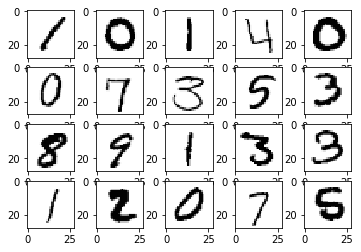

In [8]:
# Visualizing data
image_index = 20  # You may select anything up to 42,000
for i in range(image_index):
    plt.subplot(4,5,i+1)
    plt.imshow(X[i].reshape((28,28)), cmap='Greys',)
plt.show()

In [9]:
# Rescaling and reshaping data 
X /= 255.0
X_test /= 255.0
X = X.reshape(X.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [10]:
# Convert the labels to binary using one hot encoding
from keras.utils import to_categorical
y = to_categorical(y, num_classes = 10)

Using TensorFlow backend.


In [11]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [12]:
# Importing Keras libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [13]:
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Image preprocessing
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 15,
                                   zoom_range = 0.1,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1)

In [15]:
# Fitting the CNN to the images
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data = (X_val, y_val),
                    steps_per_epoch=X_train.shape[0] // 64, epochs=25)

Epoch 1/25
590/590 [==============================] - 30s 51ms/step - loss: 0.4740 - acc: 0.8493 - val_loss: 0.0780 - val_acc: 0.9738
Epoch 2/25
590/590 [==============================] - 30s 50ms/step - loss: 0.1843 - acc: 0.9421 - val_loss: 0.0597 - val_acc: 0.9802
Epoch 3/25
590/590 [==============================] - 30s 51ms/step - loss: 0.1467 - acc: 0.9546 - val_loss: 0.0415 - val_acc: 0.9876
Epoch 4/25
590/590 [==============================] - 30s 52ms/step - loss: 0.1258 - acc: 0.9609 - val_loss: 0.0354 - val_acc: 0.9881
Epoch 5/25
590/590 [==============================] - 30s 51ms/step - loss: 0.1190 - acc: 0.9630 - val_loss: 0.0376 - val_acc: 0.9876
Epoch 6/25
590/590 [==============================] - 31s 52ms/step - loss: 0.1071 - acc: 0.9667 - val_loss: 0.0302 - val_acc: 0.9900
Epoch 7/25
590/590 [==============================] - 30s 51ms/step - loss: 0.1027 - acc: 0.9679 - val_loss: 0.0347 - val_acc: 0.9890
Epoch 8/25
590/590 [==============================] - 31s 52ms

In [16]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Loss: {0:.6f}, Accuracy: {1:.6f}".format(loss, accuracy))

predicted = model.predict_classes(X_test)

Loss: 0.034921, Accuracy: 0.988571
